In [5]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from analysis import * 

In [6]:
## Epic units package

from astropy import units
from astropy import constants as c

c.G.to('km3 / (M_sun s2)')

<Quantity 1.3271244e+11 km3 / (s2 solMass)>

In [7]:
predischarged, discharged, accreted, preheated, heated = read_discharged()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (predischarged, discharged, accreted, preheated, heated) for all available satellites <


In [8]:
discharged

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,sat_disk,sat_halo,host_disk,host_halo,other_sat,IGM,t,sat_Mvir,angle,key
190920,11.214915,2202002,0.000120,53035.859375,28366.376150,10.908183,6.698204,0.121201,0.612335,-0.205156,...,False,True,False,False,False,False,11.214915,9.786175e+09,134.055296,h148_13
246974,12.507856,2202002,0.000027,16609.818359,29001.936444,12.388833,8.954684,0.148129,8.203483,-3.552072,...,False,True,False,False,False,False,12.507856,9.585598e+09,46.365776,h148_13
132506,9.921974,2857672,0.000126,58067.246094,27134.726367,9.669960,7.982986,0.155638,-0.130506,7.981885,...,False,True,False,False,False,False,9.921974,1.066215e+10,95.014185,h148_13
161854,10.767100,4073949,0.058975,9752.045898,26835.758536,0.000000,0.849211,0.015786,-0.681446,-0.438338,...,False,True,False,False,False,False,10.767100,1.002284e+10,12.792650,h148_13
190924,11.214915,4073949,0.000031,54464.347656,26965.973341,11.058858,11.656469,0.210918,-5.592503,8.339077,...,False,True,False,False,False,False,11.214915,9.786175e+09,53.294073,h148_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39323,9.383249,6628979,0.001709,21003.914062,26610.570287,0.000000,2.218914,0.078645,-1.036233,-1.802731,...,False,True,False,False,False,False,9.383249,2.031549e+09,55.149343,h329_33
21846,8.413543,6630126,0.063785,11265.299805,26755.941329,8.272644,0.819111,0.027533,-0.748168,-0.128032,...,False,True,False,False,False,False,8.413543,3.091517e+09,53.793614,h329_33
13105,7.767072,6630131,0.073664,11408.226562,26557.801505,0.000000,1.238168,0.043742,-0.672080,-1.000479,...,False,True,False,False,False,False,7.767072,3.202585e+09,135.597690,h329_33
34964,9.060013,6630131,0.001204,23144.421875,26557.970752,0.000000,9.890922,0.359088,5.622277,-2.603158,...,False,True,False,False,False,False,9.060013,2.054089e+09,52.192600,h329_33


In [9]:
G = c.G.to('km^3 / (M_sun s^2)')

hubble =  0.6776942783267969
# a = float(s.properties['a'])

In [10]:
(discharged.v)/(np.sqrt(2 * c.G.to('km^3 / (M_sun s^2)') * discharged.sat_Mvir / discharged.r))

190920    8.901671e-10
246974    2.539664e-09
132506    1.262582e-09
161854    4.522019e-10
190924    1.958880e-09
              ...     
39323     1.312192e-09
21846     2.126764e-10
13105     3.917179e-10
34964     2.182532e-09
17484     1.736459e-10
Length: 241104, dtype: float64

In [29]:
# compiling escape velocities for each particle's respective satellite.
pre_vesc = np.sqrt(2 * G * (predischarged.sat_Mvir / predischarged.r)*(1/3.086e16))
all_vesc = np.sqrt(2 * G * (discharged.sat_Mvir / discharged.r)*(1/3.086e16))
acc_vesc = np.sqrt(2 * G * (accreted.sat_Mvir / accreted.r)*(1/3.086e16))
hpre_vesc = np.sqrt(2 * G * (preheated.sat_Mvir / preheated.r)*(1/3.086e16))
hot_vesc = np.sqrt(2 * G * (heated.sat_Mvir / heated.r)*(1/3.086e16))


# creating callable key effective velocity.
predischarged['v_per_Vesc'] = predischarged.v / pre_vesc

discharged['v_per_Vesc'] = discharged.v / all_vesc

accreted['v_per_Vesc'] = accreted.v / acc_vesc

preheated['v_per_Vesc'] = preheated.v / hpre_vesc

heated['v_per_Vesc'] = heated.v / hot_vesc

In [25]:
all_vesc

190920    112.098592
246974     95.952729
132506    107.179711
161854    318.610780
190924     84.975912
             ...    
39323      88.739355
21846     180.171995
13105     149.153477
34964      42.263370
17484     181.908197
Length: 241104, dtype: float64

In [17]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

preheated['weight'] = preheated['mass'] / preheated['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

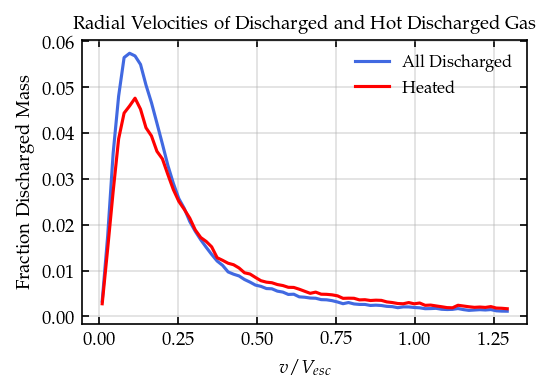

In [33]:
##### plotting all discharged vs. SNe-heated discharged gas #####
bins = 75
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# all discharged.
y1, x = np.histogram(discharged.v_per_Vesc, bins=bins, weights=discharged.weight, range=(0, 1.3))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='royalblue')

# sne-heated discharge.
y1, x = np.histogram(heated.v_per_Vesc, bins=bins, weights=heated.weight, range=(0, 1.3))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Discharged Gas', fontsize='medium')
ax.set_xlabel(r'$v/V_{esc}$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1e10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

plt.show()

In [62]:
# compiling virial velocities for each particle's respective satellite.
pre_vvir = np.sqrt(G * predischarged.sat_Mvir / predischarged.satRvir)
all_vvir = np.sqrt(G * discharged.sat_Mvir / discharged.satRvir)
acc_vvir = np.sqrt(G * accreted.sat_Mvir / accreted.satRvir)
hpre_vvir = np.sqrt(G * preheated.sat_Mvir / preheated.satRvir)
hot_vvir = np.sqrt(G * heated.sat_Mvir / heated.satRvir)


# creating callable key for effective velocity.
predischarged['v_per_Vvir'] = predischarged.v / pre_vvir

discharged['v_per_Vvir'] = discharged.v / all_vvir

accreted['v_per_Vvir'] = accreted.v / acc_vvir

preheated['v_per_Vvir'] = preheated.v / hpre_vvir

heated['v_per_Vvir'] = heated.v / hot_vvir

In [69]:
discharged.v_per_Vvir.max()

1.679721956080866e-07

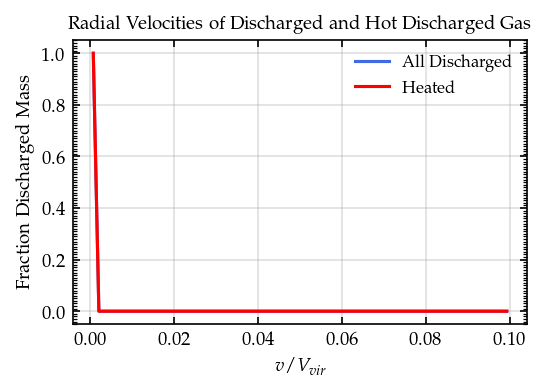

In [67]:
##### plotting all discharged vs. SNe-heated discharged gas #####
bins = 75
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# all discharged.
y1, x = np.histogram(discharged.v_per_Vvir, bins=bins, weights=discharged.weight, range=(0,0.1))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='royalblue')

# sne-heated discharge.
y1, x = np.histogram(heated.v_per_Vvir, bins=bins, weights=heated.weight, range=(0, 0.1))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Discharged Gas', fontsize='medium')
ax.set_xlabel(r'$v/V_{vir}$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1e10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

plt.show()